In [1]:
#import panada for dataframe
import pandas as pd

import numpy as np

#logistic regression
from sklearn.linear_model import LogisticRegression

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 



In [2]:
#reading the data from "Bank_Personal_Loan_Modelling.xlsx" using panda 

In [3]:
#reading fisrt row as column name 
loan_df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheetname="Data",header=0)

In [4]:
#glimpse of data 
loan_df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [5]:
loan_df.shape


(5000, 14)

In [6]:
#5000 rows and 14fetaures check the data type of column
loan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
#all the fetaures is of numerical data type cross ver


In [8]:
#~ means it will print if value is not real
loan_df[~loan_df.applymap(np.isreal).all(1)]  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [9]:
# from the above looks like all are real

In [10]:
#check if any null value 
#check nan value
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
#check the distribution 

In [12]:
#analysze the distribution of the various attributes
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
#Age mean and median are same 
#Experience -mean and median are same
#Income -mean and median are not same outliers may present
#Family same
#CCAvg -little difference 
#education alomst same
#mortgagae is having major difference 
#


In [14]:
loan_df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [15]:
# only 480 people has accepted loan and 4520 has not perfectly imbalanced data

In [16]:
#--First we will analyse with Decision Tree Classifier 
#--With parameter DTC
#--Randome Forest 

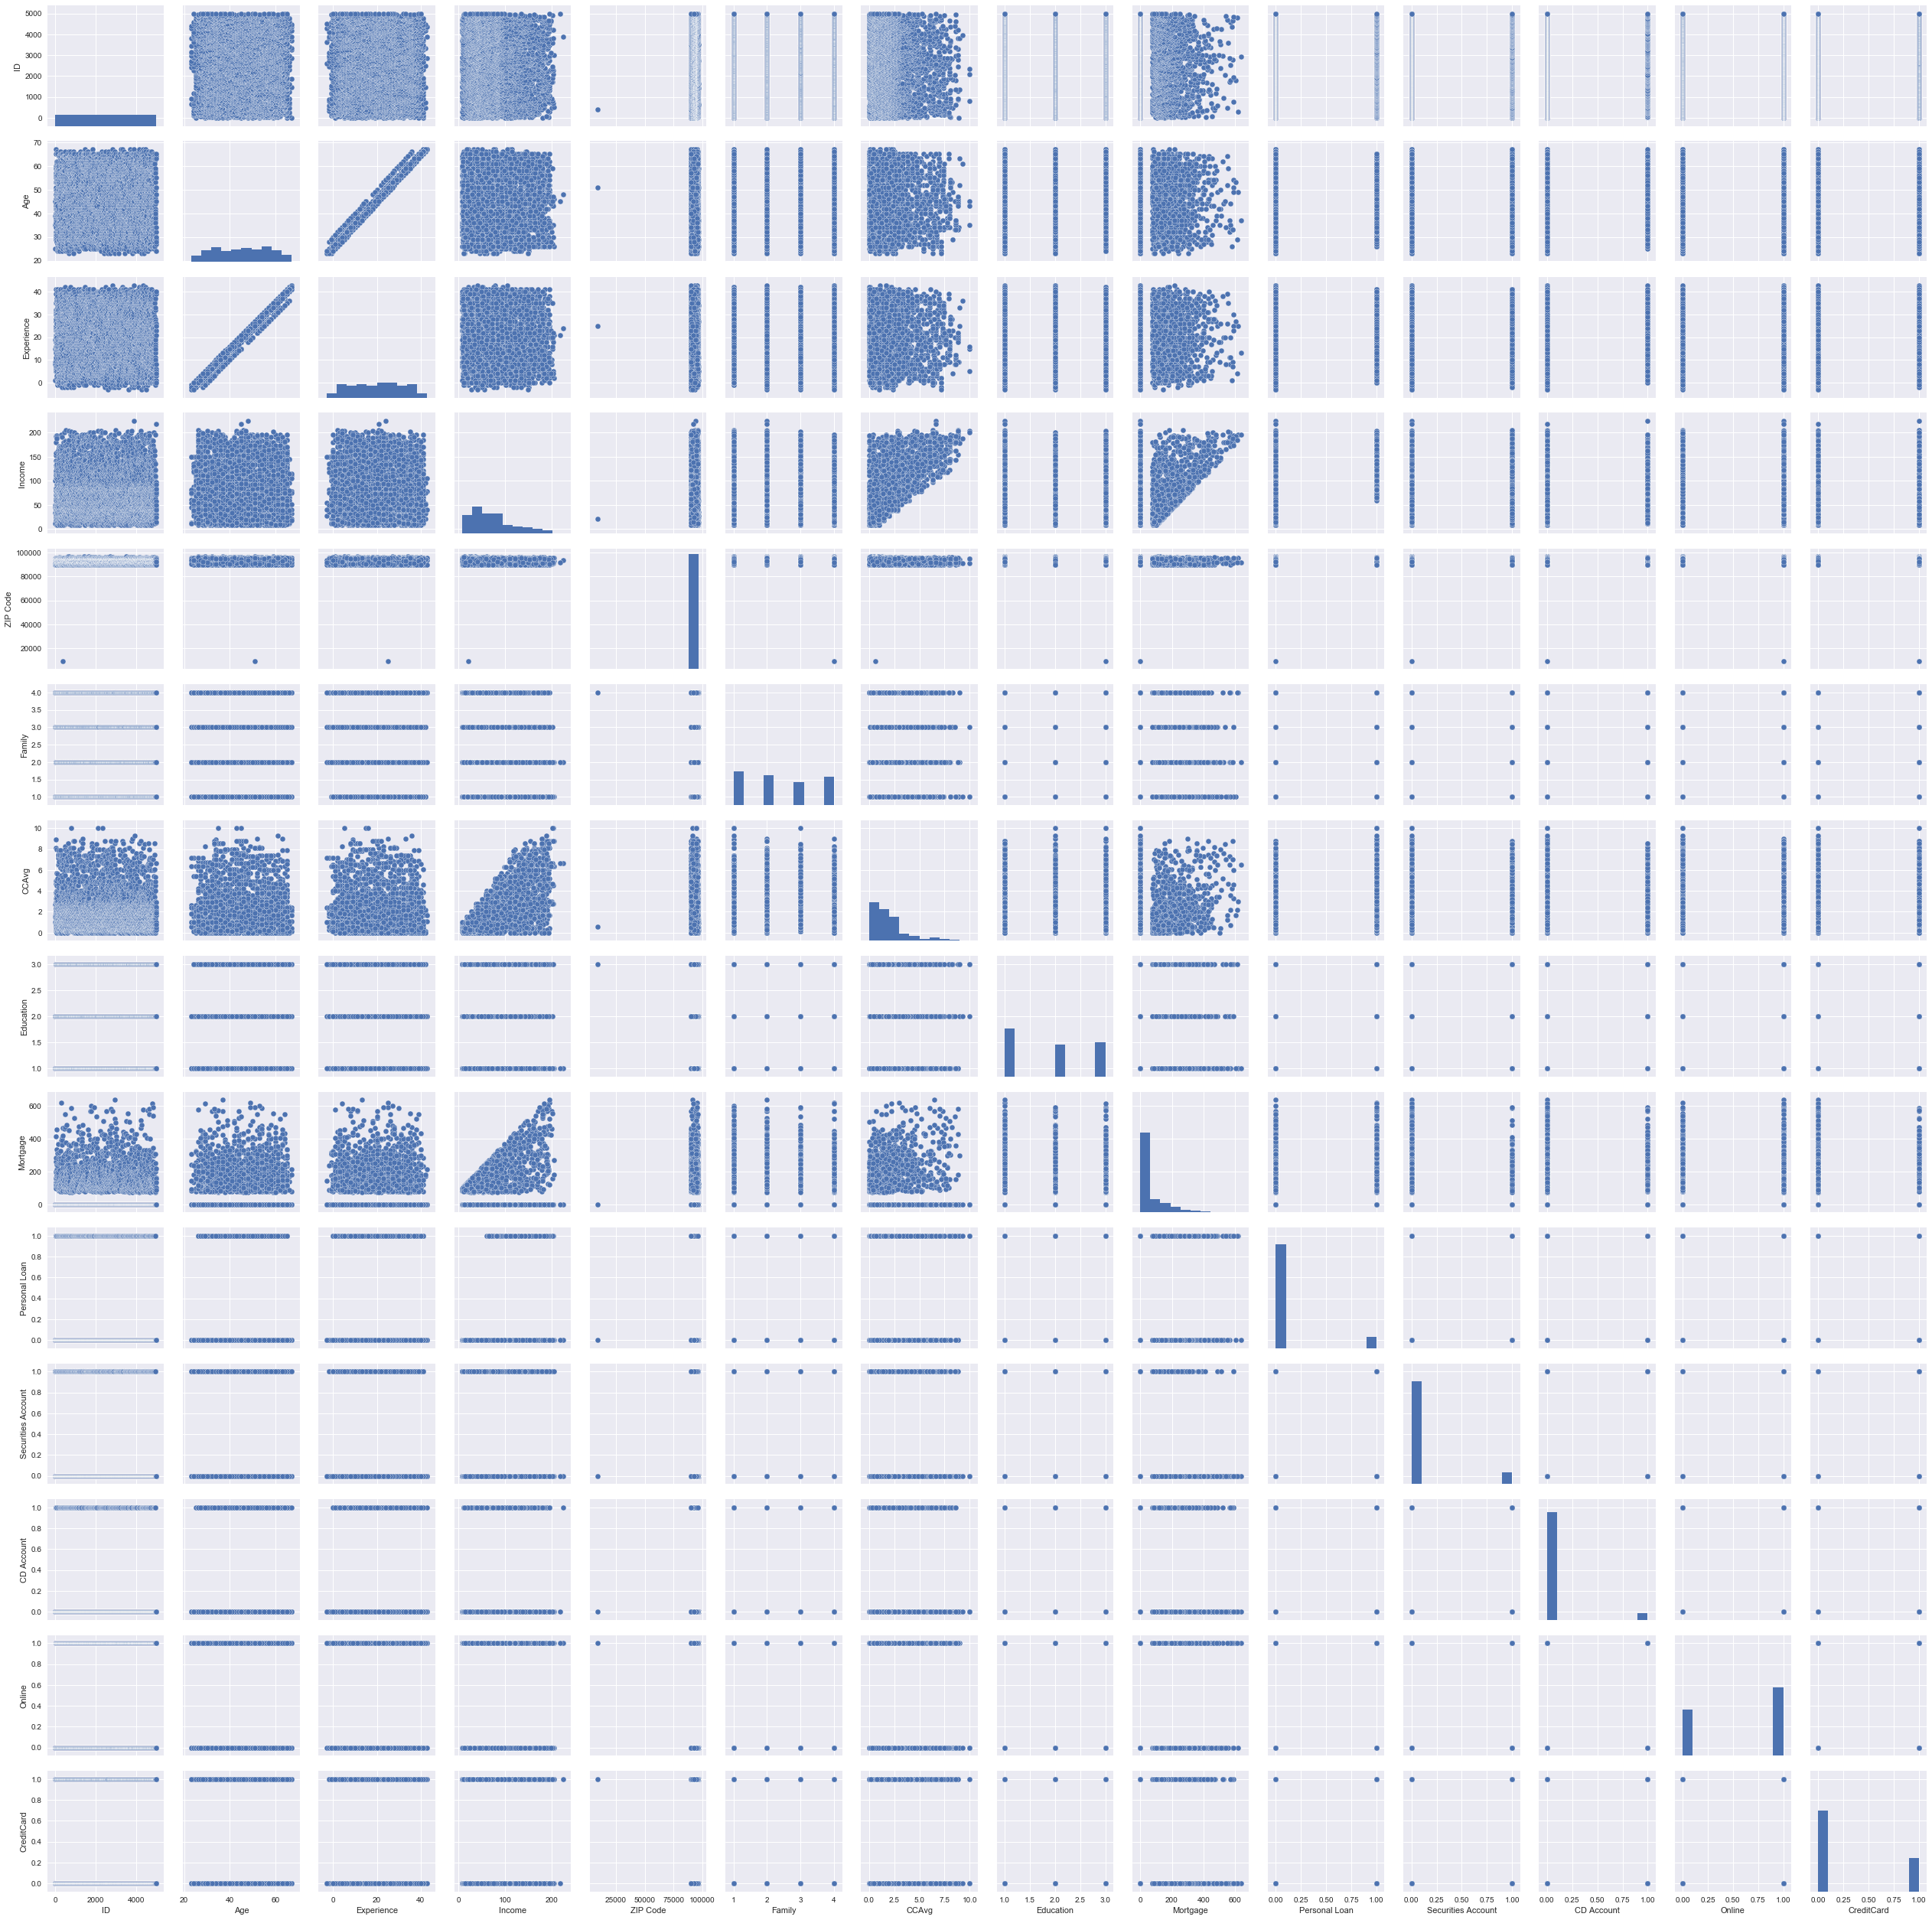

In [17]:
#pair plot 


sns.pairplot(loan_df)

In [18]:
X = loan_df.iloc[:,loan_df.columns!='Personal Loan'] # select all rows and first 8 columns which are the attributes

In [19]:
#just to verify 
X.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0


In [20]:
y=loan_df[['Personal Loan']]

In [21]:
#just to verify
y.head(2)

,Personal Loan
0,0
1,0


In [22]:
#Todo Check if header need to remove before splitting or not 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
logis_model = LogisticRegression()

In [24]:
logis_model.fit(X_train, y_train)

C:\Users\Ravi\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
logis_model.score(X_test , y_test)

0.90800000000000003

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
############### Decision Tree Classifier

In [28]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [29]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [30]:
dt_model.score(X_test , y_test)

0.98199999999999998

In [31]:
############# Random Forest Classifier

In [32]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [33]:
rf_clf.fit(X_train, y_train)

C:\Users\Ravi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [34]:
rf_clf.score(X_test , y_test)

0.97666666666666668

In [35]:
###############3 KNN 

In [36]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

In [38]:
# fitting the model
knn.fit(X_train, y_train)

C:\Users\Ravi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
knn.score(X_test , y_test)

0.90200000000000002

 Apply Upsampling : As it is a perfect example of imbalanced classification Applying here
                    Upsampling Upsampling means increase the number of dataframe which is minority since here minority 
                    is 0 .So Upscaling that part of data and make it equivalent 0

In [39]:
from sklearn.utils import resample  #for sampling

In [43]:
# Separate 0 and 1 classes
loan_df_0 = loan_df[loan_df['Personal Loan']==0]
loan_df_1 = loan_df[loan_df['Personal Loan']==1]

In [44]:
print loan_df_0.shape

(4520, 14)


In [45]:
print loan_df_1.shape

(480, 14)


In [46]:
#######using UPSampling as to increase the minority class which is here it is loan_df_1

In [47]:
# Upsample minority class
loan_df_1_upsampled = resample(loan_df_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=4520,    # to match majority which is 0class
                                 random_state=123) # reproducible results

In [48]:
# Combine majority class with upsampled minority class
loan_df_upsampled = pd.concat([loan_df_0, loan_df_1_upsampled])

In [50]:
print loan_df_upsampled.shape

(9040, 14)


In [53]:
#just to verify
loan_df_upsampled['Personal Loan'].value_counts()

1    4520
0    4520
Name: Personal Loan, dtype: int64

In [54]:
##now train the model Decision tree

In [55]:
X_upsample = loan_df_upsampled.iloc[:,loan_df_upsampled.columns!='Personal Loan'] # select all rows and first 8 columns which are the attributes

In [58]:
y_upsample=loan_df_upsampled[['Personal Loan']]

In [59]:
#Todo Check if header need to remove before splitting or not 
X_upsample_train, X_upsample_test, y_upsample_train, y_upsample_test = train_test_split(X_upsample, y_upsample, test_size=0.3, random_state=1)

In [60]:
dt_model.fit(X_upsample_train, y_upsample_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [61]:
dt_model.score(X_upsample_test , y_upsample_test)

0.99594395280235992

In [62]:
# accuracy improved for Decision Tree

In [63]:
######33 check for knn clasifier

In [67]:
# fitting the model
knn.fit(X_upsample_train, y_upsample_train)

C:\Users\Ravi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
knn.score(X_upsample_test , y_upsample_test)

0.89859882005899705

In [69]:
######333 logistic regression################

In [70]:
logis_model.fit(X_upsample_train, y_upsample_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
logis_model.score(X_upsample_test , y_upsample_test)

0.89712389380530977

In [87]:
y_upsample_train

,Personal Loan
3757,1
321,1
2533,1
4532,1
1589,1
2885,1
2269,0
2267,1
3942,0
3273,0


 GRID SEARCH  :just to get the best parameter and avoid overfitting 

In [94]:
from sklearn.grid_search import GridSearchCV
from operator import itemgetter

In [73]:
# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [79]:
dt_grid = DecisionTreeClassifier()

In [89]:
 gs_dt = GridSearchCV(dt_grid,
                               param_grid=param_grid,
                               cv=10)

In [90]:
gs_dt.fit(X_upsample_train, y_upsample_train['Personal Loan'])

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 10, 20], 'max_leaf_nodes': [None, 5, 10, 20], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [95]:
 top_scores = sorted(gs_dt.grid_scores_,
                        key=itemgetter(1),
                        reverse=True)[:3]

In [97]:
for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

Model with rank: 1
Mean validation score: 0.993 (std: 0.003)
Parameters: {'min_samples_split': 2, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Model with rank: 2
Mean validation score: 0.992 (std: 0.003)
Parameters: {'min_samples_split': 2, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.992 (std: 0.003)
Parameters: {'min_samples_split': 2, 'max_leaf_nodes': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

